In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
peripartum_df = pd.read_csv("../Dataset/peripartum_processed.csv")

In [3]:
x = peripartum_df.drop(['RiskLevel'], axis=1)
y = peripartum_df['RiskLevel']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5, stratify=y)

### Deafult model configuration

In [4]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       102
           1       0.71      0.82      0.76        84
           2       0.86      0.82      0.84        68

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.82      0.81      0.81       254



In [5]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       102
           1       0.77      0.81      0.79        84
           2       0.86      0.87      0.86        68

    accuracy                           0.83       254
   macro avg       0.83      0.84      0.84       254
weighted avg       0.84      0.83      0.84       254



In [6]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       102
           1       0.74      0.80      0.77        84
           2       0.84      0.87      0.86        68

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.83      0.83      0.83       254



### Parameter tuning and cross validation

In [7]:
features = peripartum_df.drop(['RiskLevel'], axis=1)
target = peripartum_df['RiskLevel']

Accuracy:
0.9411764705882353
Confusion matrix:


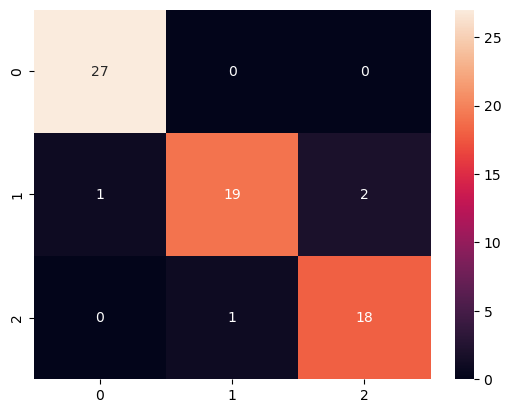

Accuracy:
0.7794117647058824
Confusion matrix:


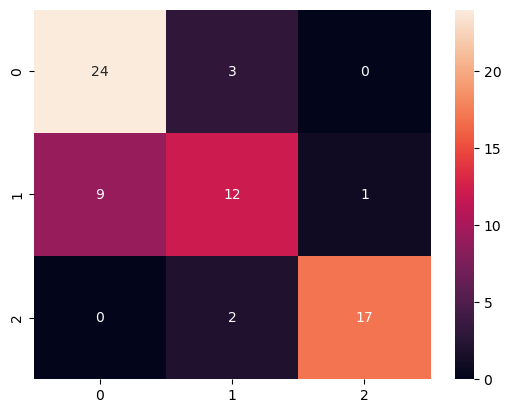

Accuracy:
0.9705882352941176
Confusion matrix:


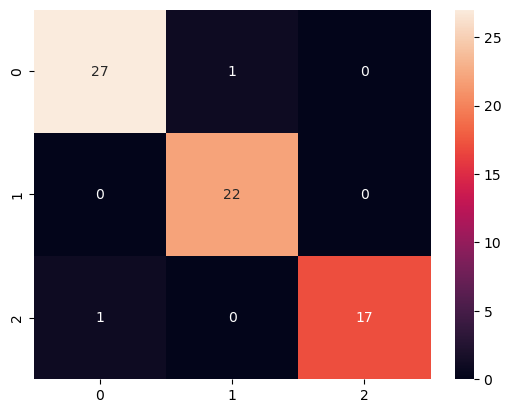

Accuracy:
0.8088235294117647
Confusion matrix:


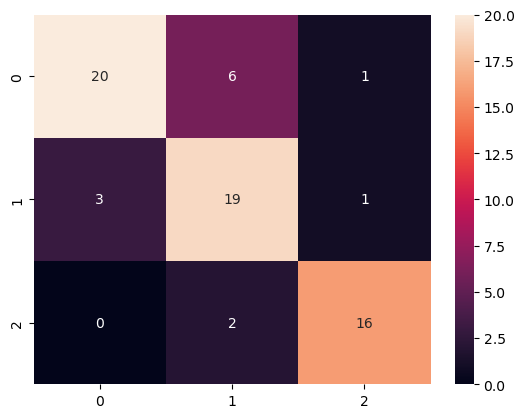

Accuracy:
0.6470588235294118
Confusion matrix:


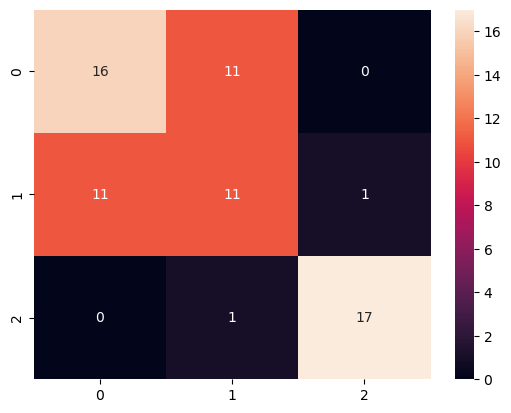

Accuracy:
0.4117647058823529
Confusion matrix:


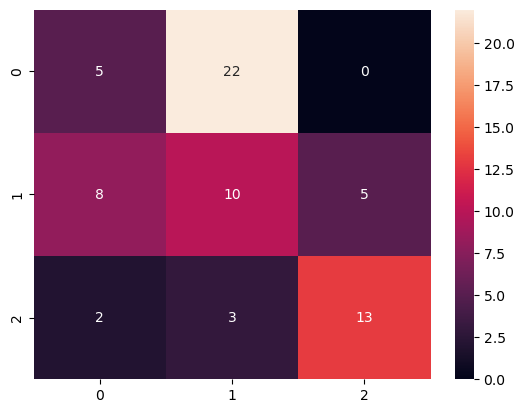

Accuracy:
0.45588235294117646
Confusion matrix:


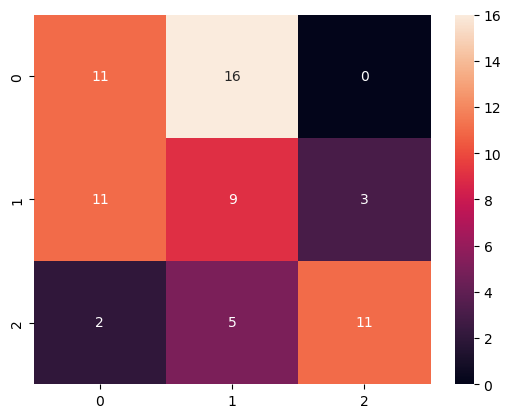

Accuracy:
0.7205882352941176
Confusion matrix:


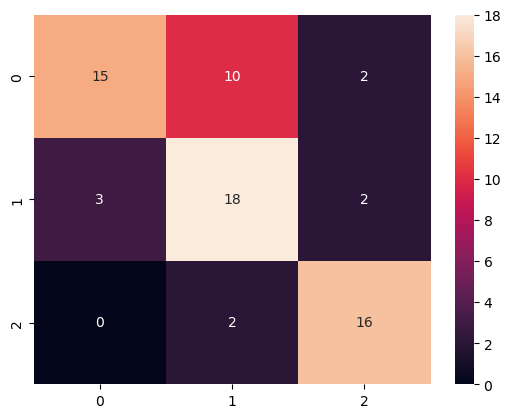

Accuracy:
0.9117647058823529
Confusion matrix:


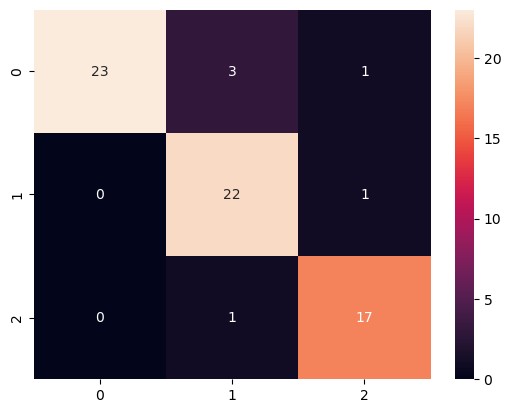

Accuracy:
0.9253731343283582
Confusion matrix:


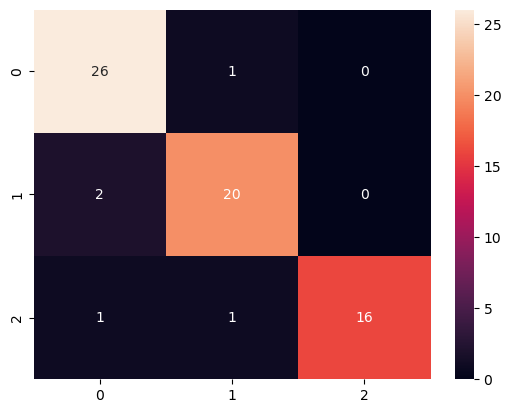

Accuracy:
0.7910447761194029
Confusion matrix:


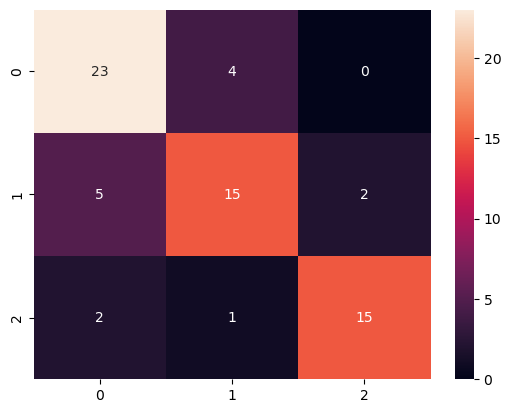

Accuracy:
0.6268656716417911
Confusion matrix:


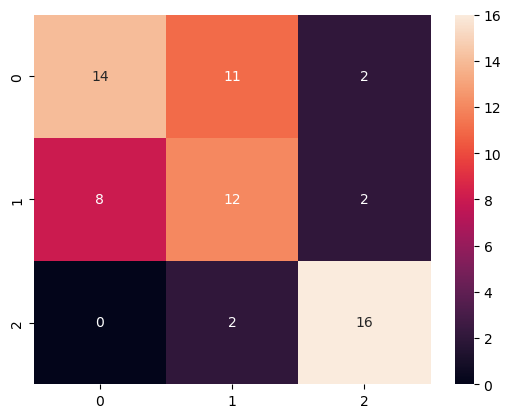

Accuracy:
0.5970149253731343
Confusion matrix:


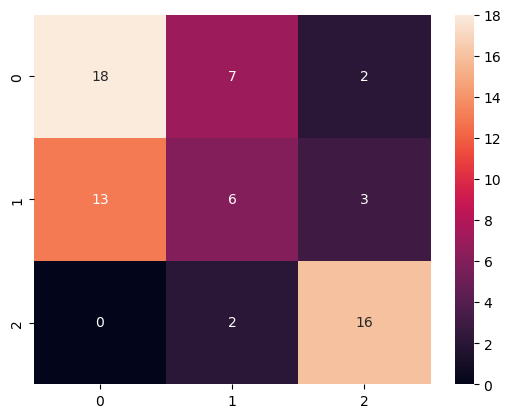

Accuracy:
0.7910447761194029
Confusion matrix:


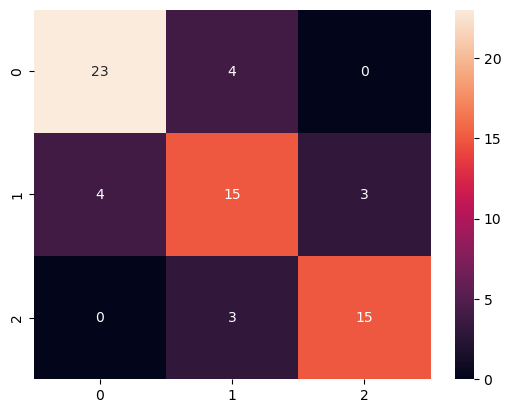

Accuracy:
0.9253731343283582
Confusion matrix:


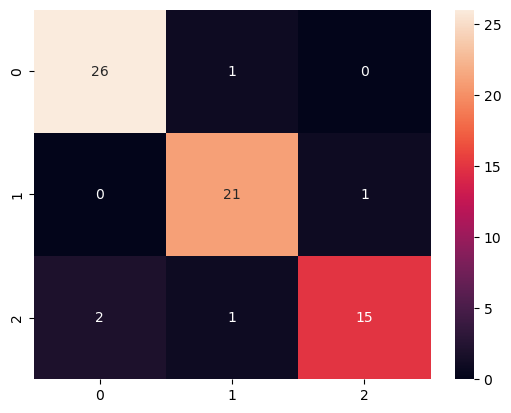

In [10]:
skf = StratifiedKFold(n_splits=15)
skf.get_n_splits(features, target)


for train_index, val_index in skf.split(features, target.astype("category")):
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = target[train_index], target[val_index]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    model = XGBClassifier(n_estimators=100, max_depth=7, eta=0.1, subsample=0.3, colsample_bytree=0.4,objective="multi:softmax",verbosity=0, use_label_encoder=False)
    model.fit(X_train_scaled, y_train)
    y_val_hat = model.predict(X_val_scaled)
    y_prob = model.predict_proba(X_val_scaled)
    print("Accuracy:")
    print(metrics.accuracy_score(tf.keras.utils.to_categorical(y_val),tf.keras.utils.to_categorical(np.argmax(y_prob,axis=1))))
    print("Confusion matrix:")
    sns.heatmap(metrics.confusion_matrix(np.asarray(y_val, dtype=int),np.argmax(y_prob,axis=1)), annot=True)
    plt.show()

Accuracy:
0.9264705882352942
Confusion matrix:


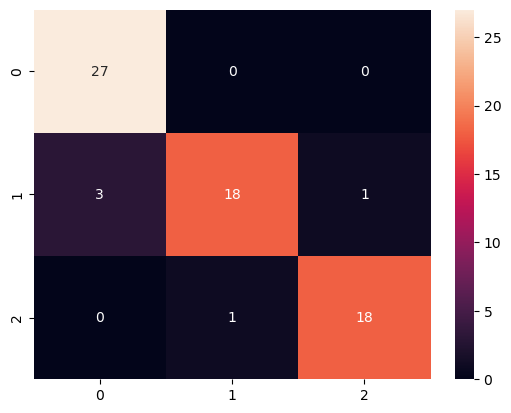

Accuracy:
0.7647058823529411
Confusion matrix:


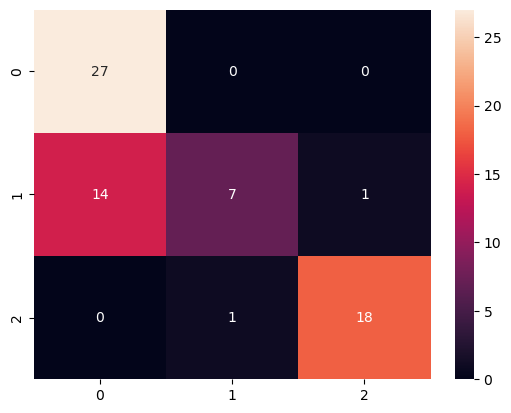

Accuracy:
0.9264705882352942
Confusion matrix:


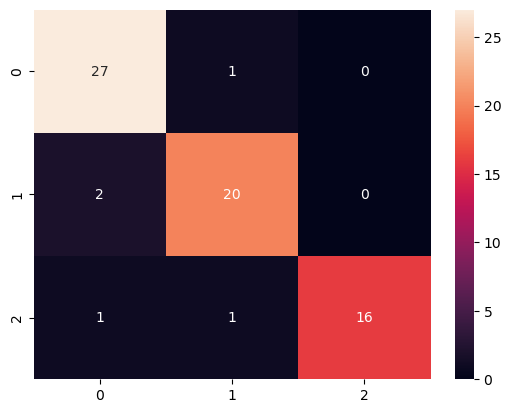

Accuracy:
0.7205882352941176
Confusion matrix:


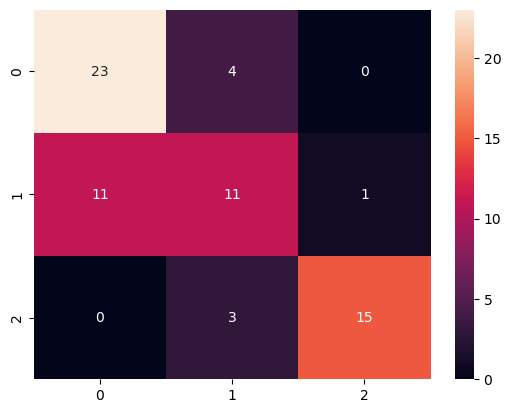

Accuracy:
0.7352941176470589
Confusion matrix:


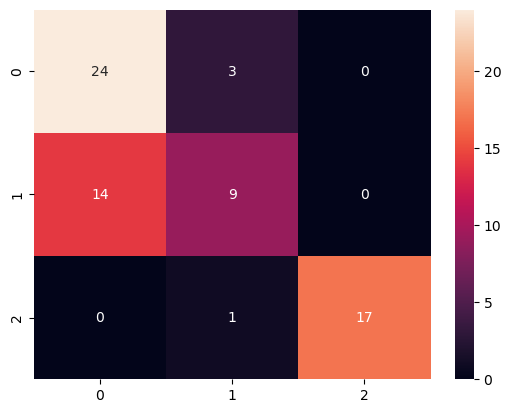

Accuracy:
0.5147058823529411
Confusion matrix:


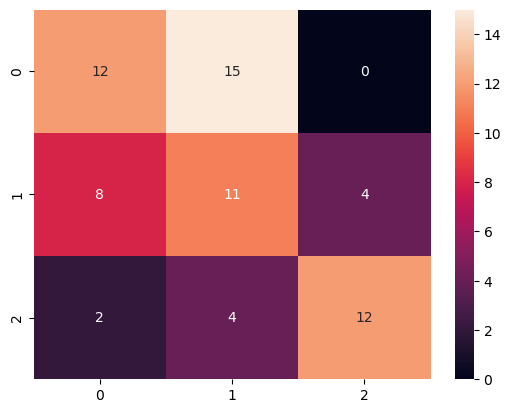

Accuracy:
0.6617647058823529
Confusion matrix:


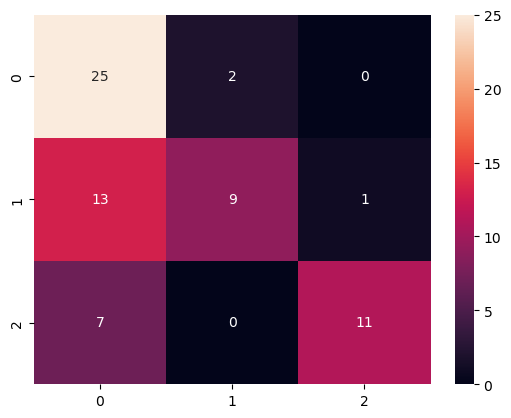

Accuracy:
0.7647058823529411
Confusion matrix:


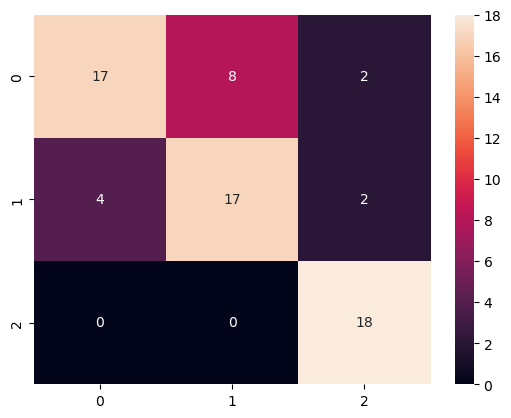

Accuracy:
0.8823529411764706
Confusion matrix:


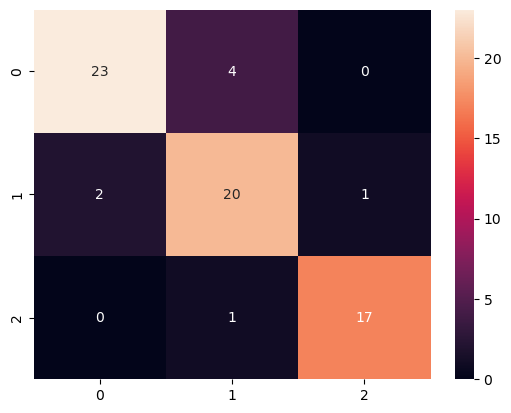

Accuracy:
0.7910447761194029
Confusion matrix:


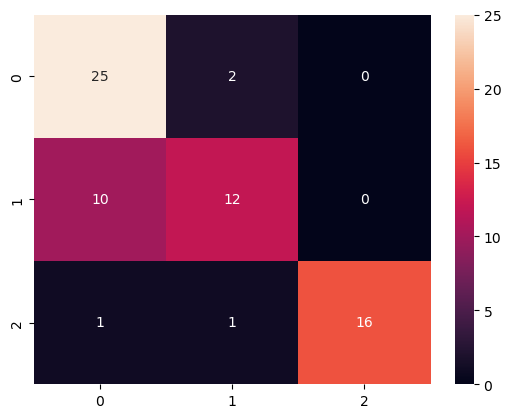

Accuracy:
0.6716417910447762
Confusion matrix:


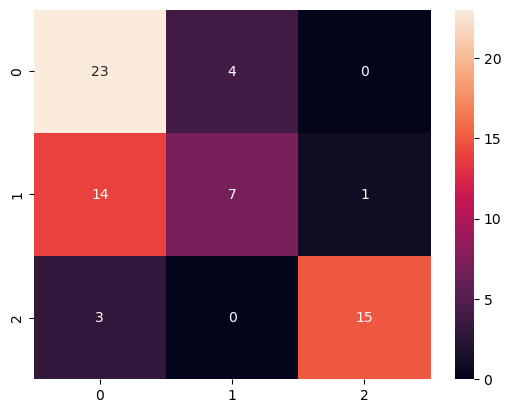

Accuracy:
0.5970149253731343
Confusion matrix:


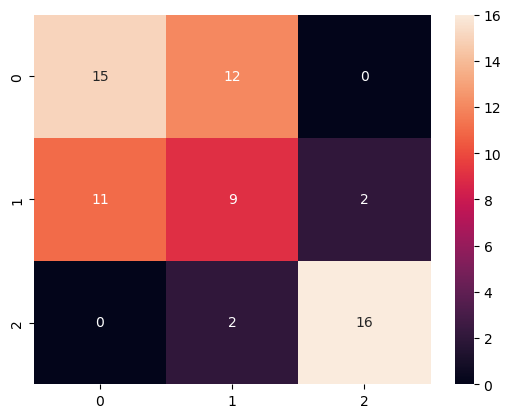

Accuracy:
0.6268656716417911
Confusion matrix:


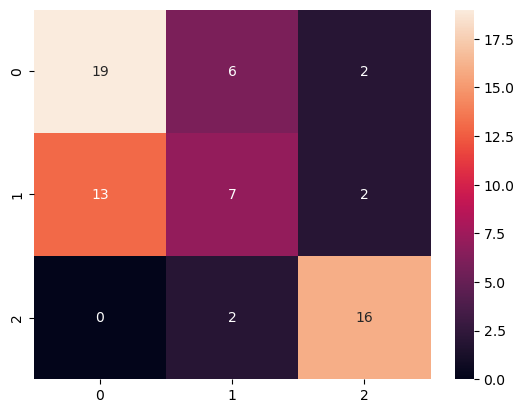

Accuracy:
0.8059701492537313
Confusion matrix:


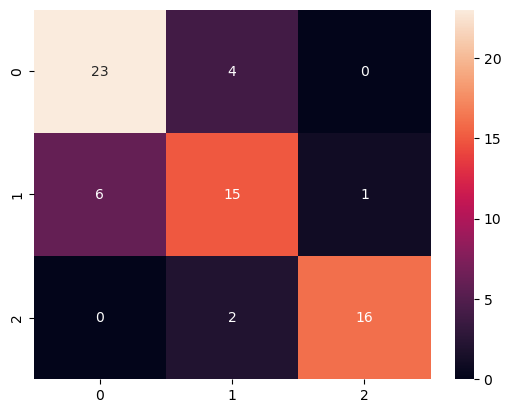

Accuracy:
0.8656716417910447
Confusion matrix:


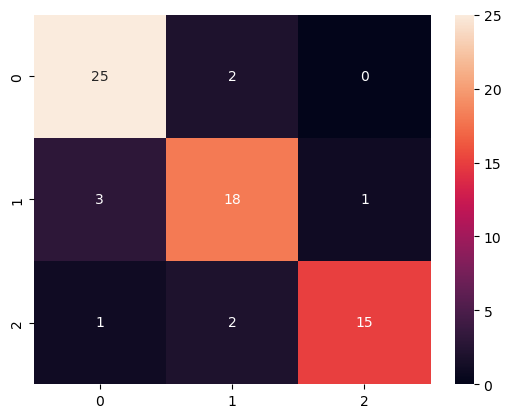

In [17]:
skf = StratifiedKFold(n_splits=15)
skf.get_n_splits(features, target)


for train_index, val_index in skf.split(features, target.astype("category")):
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = target[train_index], target[val_index]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    model = RandomForestClassifier(n_estimators=100, max_depth=7)
    model.fit(X_train_scaled, y_train)
    y_val_hat = model.predict(X_val_scaled)
    y_prob = model.predict_proba(X_val_scaled)
    print("Accuracy:")
    print(metrics.accuracy_score(tf.keras.utils.to_categorical(y_val),tf.keras.utils.to_categorical(np.argmax(y_prob,axis=1))))
    print("Confusion matrix:")
    sns.heatmap(metrics.confusion_matrix(np.asarray(y_val, dtype=int),np.argmax(y_prob,axis=1)), annot=True)
    plt.show()